# <center>크몽 데이터 분석</center> 

## INTRO

당신은 오늘 하루동안 **크몽의 일일 데이터 컨설턴트**로서 일을 할 것입니다. 크몽의 사용자 로그 데이터, 웹사이트/모바일 서비스에서 사용자들이 활동한 기록 등을 가져와, 이를 빠른 시간 안에 다듬고 정리하는 일을 맡게 될 것입니다. 하기에 제시한 **15개의 데이터 분석 요청을 프로그래밍 언어 파이썬(Python)과 파이썬의 데이터 분석 패키지 판다스(Pandas)를 활용해 분석**해 주십시오.

### [ Data & Column ]

#### **1) kmong_conversion.csv**

크몽의 웹사이트/모바일 서비스에서 활동한 모든 활동 기록(activity)이 상세하게 담겨져 있으며, 이 정보를 바탕으로 데이터를 분석하여 사용자의 패턴을 유추할 수 있습니다. 컬럼 정보는 다음과 같습니다.

* ```eventcategory```: 앱의 이벤트에 대한 카테고리입니다. 크게 다음의 종류가 있습니다.
  - ```install```: 앱설치
  - ```launch```: 앱실행 
  - ```deeplinkLaunch```: 딥링크 통한 앱실행
  - ```goal```: 앱 내에서의 활동 여부
  - ```exit```: 앱 종료
  - ```foreground```, ```background```: 앱을 foreground, background로 전환
  - ```launchlnSession```: Session의 시작.
* ```isfirstactivity```: 해당 이벤트가 해당 유저에 한하여 첫 번째인지 혹은 두 번째 이상인지를 알려주는 값입니다. 
  - boolean 형식으로, 해당 이벤트가 해당 유저에 한하여 첫 번째 이벤트이면 True, 아니면 False를 갖습니다.
* ```apppackagename```: 앱의 패키지의 고유한 이름입니다. 안드로이드의 경우 applicationId을, iOS의 경우 Bundle ID를 가져오게 됩니다.
* ```appversion```: kmong 어플리케이션의 버전입니다.
* ```devicetype```: 사용자가 kmong app을 실행하고 있는 기기의 제품명입니다.
* ```devicemanufacturer```: 사용자가 kmong app을 실행하고 있는 기기의 제조회사입니다. 
* ```osversion```: 사용자가 kmong app을 실행하고 있는 기기의 os 버전입니다.
* ```canonicaldeviceuuid```: 사용자가 kmong app을 실행하고 있는 기기의 고유 식별자입니다. (사용자를 구분하는 식별자로 이용할 수 있습니다)
* ```sourcetype```: 해당 로그를 만든 고객이 유입된 경로입니다. 유료 광고 채널, 바이럴 채널, 앱 마켓 등으로 구분합니다.
* ```channel```: sourcetype과 동일하지만 조금 더 세분화되어 있습니다.
  - unattributed, WEB, google-play, m_naver, google, (not set), google.adwords, m_naverpowercontents, pc_naver, apple.searchads, facebook, m_daum
* ```params_campaign```: 마케터가 입력한 캠페인 파라미터 중 캠페인명입니다. 
* ```params_medium```: 마케터가 입력한 캠페인 파라미터 중 매체입니다.
* ```params_term```: 마케터가 입력한 캠페인 파라미터 중 키워드입니다.
* ```inappeventcategory```: 인앱이벤트 식별자값으로 인앱이벤트를 지칭하는 3개의 값(category > action > label) 중 가장 상위에 속하는 구분값입니다.
  - ```eventcategory```가 goal인 경우에만 제공됩니다.
  - 차후에 읽어올 funnel 데이터셋과 연결할 수 있습니다.
  - ex) seller_selling_history.view, gig_detail.view
* ```inappeventlabel```: categoryid와 동일합니다.
  - 차후에 읽어올 category 데이터셋과 연결할 수 있습니다.
  - 인앱이벤트를 지칭하는 3개의 값(category > action > label) 중 마지막에 속하는 구분값입니다.
* ```eventdatetime```: 모바일 클라이언트 상에서의 실제 이벤트 발생시간입니다. ISO 8601 표준에 따라서 제공됩니다. 
* ```isfirstgoalactivity```: goal 이벤트의 경우, 해당 Goal Label, Description, Key, Category를 가진 이벤트가 해당 유저에 한하여 첫 번째인지 혹은 두 번째 이상 인지를 알려주는 boolean 값입니다. 예를 들어 동일한 유저로부터 두 번 이상의 같은 Goal 이벤트가 발생한 경우(e.g. 동일한 물건 재구매 등) 이 값은 false가 됩니다.

* ```event_rank```: 데이터를 정렬하는데 필요한 컬럼입니다. log엔 기록되지 않으며, DS_School에서 제공하는 전처리된 컬럼입니다.

#### **2) kmong-funnel.csv**

그 다음 가져올 데이터셋은 퍼널(Funnel) 정보를 나타내는 ```kmong-funnel.csv``` 입니다. 퍼널은 사용자가 서비스에 접속한 뒤 상품을 구매하기까지의 모든 경로를 구조화 한 것을 의미합니다. 

사용자가 특정 상품을 결제하기 위해선, 해당 상품의 설명을 적은 페이지를 방문해야 하며, 상품 설명 페이지를 방문하기 위해서는 해당 상품이 리스트되어있는 페이지를 방문해야 합니다. 이런 방식으로 웹사이트를 설명하는 것을 일명 퍼널이라고 합니다.

<img src="https://cdn-images-1.medium.com/max/1600/0*voRGTKciwKuIb2HS.png" width=480 />

<br />
<center><small>사용자가 처음 유입(Acquistion) 되었을 때부터 구매(Revenue)를 할 때 까지의 모든 과정을 깔때기로 묘사한 것을 퍼널이라고 합니다.
<br />    
(참고 자료: <a href="https://medium.com/the-school-of-mobile/app-marketing-metrics-for-pirates-growth-hacking-the-purchase-funnel-b4f1219c5945">App Marketing Metrics for Pirates: Growth Hacking the Purchase Funnel</a>)</small></center>

이 퍼널 정보를 이용해 사용자가 상품을 구매하는 전환(Conversion) 여부, 내지는 서비스를 이탈하는 이탈(Churn) 여부를 추적할 수 있으며, 이를 통해서 웹사이트나 모바일서비스를 개선하여 전환율을 높이고 이탈률을 낮출 수 있습니다. 크몽에서는 서비스에서 사용하는 퍼널에 대한 설명을 ```kmong-funnel.csv``` 파일에 저장해두고 있습니다.

#### **3) kmong-category.csv**

마지막으로 가져올 데이터셋은 크몽에서 판매하는 상품의 카테고리를 나타내는 ```kmong-category.csv``` 입니다. 크몽에서는 디자인, 번역, 컨텐츠 제작등 다양한 상품을 판매하고 있는데, 이 상품을 그룹화하고 정리할 수 있도록 만든 것이 카테고리입니다. 크몽에서는 이 값을 ```kmong-category.csv``` 라는 변수에 저장해두고 있습니다.

In [1]:
import pandas as pd

## 1.Load Dataset

In [2]:
# kmong-conversion.csv

raw_log = pd.read_csv("data/kmong-conversion.csv")

print(raw_log.shape)
raw_log.columns

(434244, 19)


Index(['eventcategory', 'isfirstactivity', 'apppackagename', 'appversion',
       'devicetype', 'devicemanufacturer', 'osversion', 'canonicaldeviceuuid',
       'sourcetype', 'channel', 'params_campaign', 'params_medium',
       'params_term', 'inappeventcategory', 'inappeventlabel', 'eventdatetime',
       'rowuuid', 'isfirstgoalactivity', 'event_rank'],
      dtype='object')

In [3]:
raw_log.head()

,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28T00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28T00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28T00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28T00:00:01+09:00,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,NaN,NaN,NaN,buyer_order_track.view,NaN,2018-09-28T00:00:02+09:00,236e9946-7801-4898-b609-06c8ab1139dc,False,True


In [4]:
# kmong-funnel.csv

raw_funnel = pd.read_csv("data/kmong-funnel.csv")

print(raw_funnel.shape)
raw_funnel.columns

(53, 6)


Index(['Lv2', 'viewid', 'viewid desc', 'Lv1', 'funnel name', 'funnel desc'], dtype='object')

In [5]:
raw_funnel

,Lv2,viewid,viewid desc,Lv1,funnel name,funnel desc
0,1100,home,홈 (탭),11,home,홈
1,1210,category_list,카테고리 목록 (탭),12,category,카테고리
2,1200,category_gig,카테고리-상품목록,12,category,카테고리
3,1300,search,검색,13,search,검색
4,1301,search_gig,검색-상품목록,13,search,검색
5,1302,search_seller,검색-전문가,13,search,검색
6,1400,gig_detail,상품상세,14,gig,상품
7,1401,gig_detail_option,상품상세-상품선택,14,gig,상품
8,1420,profile,전문가프로필,14,gig,상품
9,1520,login_sns,간편로그인,15,login,로그인


In [6]:
# kmong-category.csv

raw_category = pd.read_csv("data/kmong-category.csv")

print(raw_category.shape)
raw_category.columns

(245, 9)


Index(['depth', 'categoryid', 'categoryname', 'cat1_id', 'cat2_id', 'cat3_id',
       'cat1', 'cat2', 'cat3'],
      dtype='object')

## 2. Preprocessing

먼저 가장 기본이 되는 ```kmong-conversion.csv```부터 정리하겠습니다. 이 데이터에는 사용자의 활동 기록을 자세하게 정리하였다는 장점이 있지만, 데이터가 다소 지저분하게 기록되어 있기 때문에, 이 데이터를 정리하지 않은 채 분석하는 것은 많은 시간을 낭비하게 될 것 같습니다. 그러므로 이번 기회에 데이터를 깔끔하게 정리하여 저장하도록 하겠습니다.

**1. ```canonicaldeviceuuid``` 컬럼명을 ```userid``` 컬럼명으로 바꿔주세요.**

먼저 ```canonicaldeviceuuid```라는 컬럼명을 바꾸고 싶습니다. 이 컬럼은 크몽을 이용하는 한 명의 사용자를 나타내는 중요한 정보임에는 틀림없지만, ```canonicaldeviceuuid```라는 표현 자체가 크몽, 내지는 다른 몇몇 분야에서만 쓰이는 표현이기 때문에 이 데이터를 처음 보는 사람의 입장에서는 직관적으로 이해하기 힘듭니다. 그렇기 때문에 이 컬럼의 이름을 많은 사람들이 직관적으로 이해할 수 있는 ```userid```로 바꾸고 싶습니다. 

In [7]:
raw_log["userid"] = raw_log["canonicaldeviceuuid"]

print(raw_log.shape)
raw_log[["canonicaldeviceuuid", "userid"]].head()

(434244, 20)


,canonicaldeviceuuid,userid
0,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957
1,8a871e50-0717-4aed-9bad-04ac3c3793be,8a871e50-0717-4aed-9bad-04ac3c3793be
2,A9E5778A-8F3D-4597-9718-74BF953A9F64,A9E5778A-8F3D-4597-9718-74BF953A9F64
3,168761CB-CB67-4592-867D-52780D651297,168761CB-CB67-4592-867D-52780D651297
4,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D


**2. ```eventdatetime``` 컬럼은 datetime 형태로 바꾼 뒤 연/월/일/시/분/초 데이터를 추출해주세요.**

```eventdatetime```은 날짜와 시간 형식으로 표현되어 있습니다. (ex: 2018-01-01T00:00:00+09:00) 하지만 이 데이터를 처음 읽을 때, 판다스는 날짜 데이터로 인식하지 않고 문자열(object, 내지는 string)으로 인식합니다. 이 데이터를 날짜와 시간 형식을 나타내는 ```datetime``` 형태로 바꾼 뒤, 연/월/일/시/분/초 데이터를 추출해주세요. 최종적으로 다음의 결과가 나와야 합니다.

In [8]:
raw_log.dtypes

eventcategory           object
isfirstactivity         object
apppackagename          object
appversion              object
devicetype              object
devicemanufacturer      object
osversion               object
canonicaldeviceuuid     object
sourcetype              object
channel                 object
params_campaign         object
params_medium           object
params_term             object
inappeventcategory      object
inappeventlabel        float64
eventdatetime           object
rowuuid                 object
isfirstgoalactivity     object
event_rank                bool
userid                  object
dtype: object

In [9]:
raw_log["eventdatetime"] = pd.to_datetime(raw_log["eventdatetime"])

raw_log.dtypes

eventcategory                  object
isfirstactivity                object
apppackagename                 object
appversion                     object
devicetype                     object
devicemanufacturer             object
osversion                      object
canonicaldeviceuuid            object
sourcetype                     object
channel                        object
params_campaign                object
params_medium                  object
params_term                    object
inappeventcategory             object
inappeventlabel               float64
eventdatetime          datetime64[ns]
rowuuid                        object
isfirstgoalactivity            object
event_rank                       bool
userid                         object
dtype: object

In [10]:
raw_log["eventdatetime_year"] = raw_log["eventdatetime"].dt.year
raw_log["eventdatetime_month"] = raw_log["eventdatetime"].dt.month
raw_log["eventdatetime_day"] = raw_log["eventdatetime"].dt.day
raw_log["eventdatetime_hour"] = raw_log["eventdatetime"].dt.hour
raw_log["eventdatetime_minute"] = raw_log["eventdatetime"].dt.minute
raw_log["eventdatetime_second"] = raw_log["eventdatetime"].dt.second

print(raw_log.shape)
raw_log.head()

(434244, 26)


,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,...,rowuuid,isfirstgoalactivity,event_rank,userid,eventdatetime_year,eventdatetime_month,eventdatetime_day,eventdatetime_hour,eventdatetime_minute,eventdatetime_second
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,...,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018,9,27,15,0,0
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,...,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,8a871e50-0717-4aed-9bad-04ac3c3793be,2018,9,27,15,0,0
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,...,14eb3197-db83-493a-b7be-83582960c40b,False,True,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018,9,27,15,0,0
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,...,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True,168761CB-CB67-4592-867D-52780D651297,2018,9,27,15,0,1
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,...,236e9946-7801-4898-b609-06c8ab1139dc,False,True,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,2018,9,27,15,0,2


In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

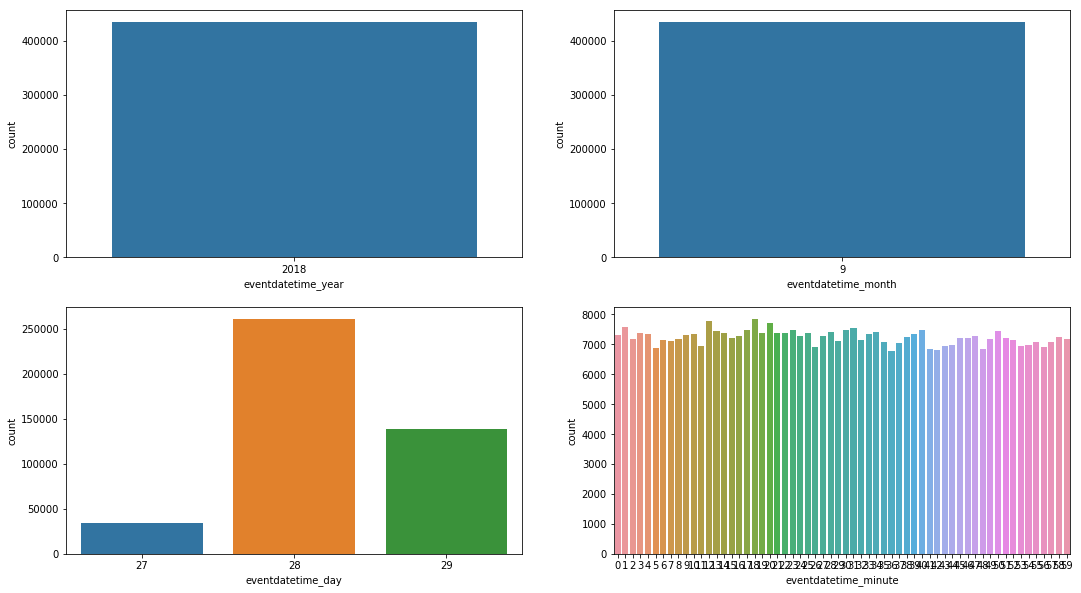

In [12]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(18, 10)

sns.countplot(data = raw_log, x = "eventdatetime_year", ax = ax1)
sns.countplot(data = raw_log, x = "eventdatetime_month", ax = ax2)
sns.countplot(data = raw_log, x = "eventdatetime_day", ax = ax3)
sns.countplot(data = raw_log, x = "eventdatetime_minute", ax = ax4)

**3. ```osversion``` 컬럼에 들어가 있는 정보를 여러 개의 컬럼으로 나눠주세요.**

```osversion``` 컬럼을 사용자가 현재 사용하고 있는 스마트폰 디바이스의 운영체제와 그 버전을 나타냅니다. 여기에는 크게 1) 현재 사용하고 있는 운영체제(Operating System, 이하 OS), 2) 그리고 해당 운영체제의 버전(version) 정보가 기록되어 있습니다. 가령 ```osversion```에 들어있는 값이 iOS11.4.1이라면, 이 스마트폰의 운영체제는 iOS(아이폰), 운영체제의 버전은 11.4.1 이라는 사실을 알 수 있습니다.

이 데이터를 차후 데이터 분석용으로 다루기 쉽게, ```ostype(clean)```과 ```osversion(clean)```이라는 두 개의 컬럼으로 분리하고 싶습니다. 가령 에를 들자면

  * ```osversion``` 컬럼값이 iOS11.4.1이라면, 새로운 컬럼인 ```ostype(clean)```에는 iOS가, ```osversion(clean)```에는 11.4.1이 들어가야 합니다.
  * ```osversion``` 컬럼값이 Android7.0이라면, 새로운 컬럼인 ```ostype(clean)```에는 Android가, ```osversion(clean)```에는 7.0이 들어가야 합니다.
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>osversion</th>
            <th>ostype(clean)</th>
            <th>osversion(clean)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>iOS11.4.1</td>
            <td>iOS</td>
            <td>11.4.1</td>
        </tr>
        <tr>
            <th>1</th>
            <td>Android7.0</td>
            <td>Android</td>
            <td>7.0</td>
        </tr>
        <tr>
            <th>2</th>
            <td>iOS12.0</td>
            <td>iOS</td>
            <td>12.0</td>
        </tr>
        <tr>
            <th>3</th>
            <td>iOS11.4.1</td>
            <td>iOS</td>
            <td>11.4.1</td>
        </tr>
        <tr>
            <th>4</th>
            <td>iOS11.4.1</td>
            <td>iOS</td>
            <td>11.4.1</td>
        </tr>
    </tbody>
</table>

In [13]:
#1 apply 활용

def find_ostype(osversion):
    if "iOS" in osversion:
        return 'iOS'
    else:
        return 'Android'
    
def find_osversion(osversion):
    return osversion.replace("iOS", "").replace("Android", "")

In [14]:
find_ostype("Android1.4.1")

'Android'

In [15]:
find_osversion("Android1.4.1")

'1.4.1'

In [16]:
raw_log["ostype_clean"] = raw_log["osversion"].apply(find_ostype)
raw_log["osversion_clean"] = raw_log["osversion"].apply(find_osversion)

print(raw_log.shape)
raw_log[["osversion", "ostype_clean", "osversion_clean"]].head()

(434244, 28)


,osversion,ostype_clean,osversion_clean
0,iOS11.4.1,iOS,11.4.1
1,Android7.0,Android,7.0
2,iOS12.0,iOS,12.0
3,iOS11.4.1,iOS,11.4.1
4,iOS11.4.1,iOS,11.4.1


In [87]:
#2 loc 활용

raw_log.loc[raw_log["osversion"].str.contains("iOS"), "ostype_clean"] = "iOS"
raw_log.loc[raw_log["osversion"].str.contains("Android"), "ostype_clean"] = "Android"

raw_log["osversion_clean"] = raw_log["osversion"].str.replace("iOS|Android", "")
    
print(raw_log.shape)
raw_log[["osversion", "ostype_clean", "osversion_clean"]].head()

(434244, 33)


,osversion,ostype_clean,osversion_clean
0,iOS11.4.1,iOS,11.4.1
1,Android7.0,Android,7.0
2,iOS12.0,iOS,12.0
3,iOS11.4.1,iOS,11.4.1
4,iOS11.4.1,iOS,11.4.1


**4. ```devicemanufacturer``` 컬럼 정보를 정리해주세요.**

```devicemanufacturer``` 컬럼은 사용자가 현재 사용하고 있는 스마트폰 디바이스를 제조한 제조사의 정보가 들어가 있습니다. 가령 ```samsung```이라고 적혀있으면 이 스마트폰은 삼성전자가 제조했다고 볼 수 있고, ```LG Electronics```라고 적혀있으면 이 스마트폰은 LG전자가 제조했다고 볼 수 있습니다. 

하지만 ```devicemanufacturer``` 컬럼에는 이 외에도 샤오미(Xiaomi), 폭스콘(Foxconn), 팬텍(PANTECH), 화웨이(HUAWEI)와 같은 마이너한 제조사 정보도 들어가 있습니다. 이 제조사들은 전체 사용자의 2%도 되지 않기 때문에, 이 데이터를 무시하거나 하나의 값(ex: Others)으로 통일해주면 데이터 분석가가 더 효율적으로 데이터를 분석할 수 있을 것 같습니다.

그러므로 ```devicemanufacturer``` 컬럼의 값을 정리해보겠습니다. 정리 방식은 다음과 같습니다.

 * ```samsung```이라고 적혀있는 값은 앞 글자를 대문자로 바꿉니다. (=```Samsung```)
 * ```LGE```와 ```LG Electronics```라는 값은 ```LG```로 통일합니다.
 * ```Apple```, ```Samsung```, ```LG```를 제외한 나머지는 ```Other```로 묶습니다.
 
최종적으로는 다음의 결과가 나와야 합니다.

  * Samsung - 230313
  * Apple - 163566
  * LG - 32649
  * Others - 7716

In [18]:
raw_log["devicemanufacturer"].value_counts()

samsung           230313
Apple             163566
LGE                32565
Xiaomi              3688
Foxconn             1248
PANTECH              706
HUAWEI               615
Google               417
Sony                 378
BlackBerry           185
TCL                  138
vivo                 122
LG Electronics        84
HOMTOM                60
OPPO                  34
asus                  28
Huawei                17
CUBOT                 17
ZUK                   15
HTC                   15
blackberry            13
SHARP                 12
UMIDIGI                8
Name: devicemanufacturer, dtype: int64

In [19]:
def devicemanufacturer_clean(devicemanufacturer) :
    if "samsung" in devicemanufacturer :
        return 'Samsung'
    elif "LG" in devicemanufacturer : 
        return 'LG'
    elif "Apple" in devicemanufacturer :
        return 'Apple'
    else : 
        return 'Other'

In [20]:
devicemanufacturer_clean("abc")

'Other'

In [21]:
raw_log["devicemanufacturer_clean"] = raw_log["devicemanufacturer"].apply(devicemanufacturer_clean)

print(raw_log.shape)
raw_log["devicemanufacturer_clean"].value_counts()

(434244, 29)


Samsung    230313
Apple      163566
LG          32649
Other        7716
Name: devicemanufacturer_clean, dtype: int64

**5. ```channel``` 컬럼 정보를 정리해주세요.**

```channel``` 컬럼을 사용자가 크몽 서비스에 유입된 경로를 기록한 정보입니다. 여기에는 웹(WEB), 구글(ex: google-play, google, google.adwords, etc), 네이버(ex: m_naver, m_naverpowercontents, pc_naver)등이 기록되어 있습니다. 이 정보도 마찬가지로 데이터를 분석하기 어렵게 산재되어 있기 때문에, 깔끔하게 정리해주고 싶습니다. 정리 방식은 다음과 같습니다.

  * 컬럼값에 google이라고 들어간 값(ex: google-play, google.adwords, etc)은 전부 google로 통일합니다.
  * 컬럼값에 daum이라고 들어간 값(ex: m_daum, etc)은 전부 daum으로 통일합니다.
  * 컬럼값이 naver라고 들어간 값(ex: m_naver, pc_naver, m_naverpowercontents, etc)은 전부 naver로 통일합니다.
  * 컬럼값에 apple이라고 들어간 값(ex: apple.searchads, etc)은 전부 apple로 통일합니다.
  * 컬럼값에 WEB이라고 들어간 값(ex: WEB)은 전부 web으로 통일합니다.
  
최종적으로는 다음의 결과가 나와야 합니다.

* unattributed - 270834
* web - 27639
* google - 27235
* (not set) - 2444
* naver - 1224
* daum - 966
* apple - 697
* facebook - 126

단, 여기서 ```channel``` 값에 빈 값(NaN, Not a Number)가 있다는 걸 주의하세요. 이 값은 소수점(float)으로 간주하기 때문에, 문자열에서 쓰이는 기능을 지원하지 않습니다. 이 점 주의해서 작성해주세요. (참고로 어떤 값이 빈 값(NaN)인지 아닌지를 구분하는 기능으로 판다스의 [isnull](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.isnull.html)을 사용하면 됩니다. 페이지의 Examples란을 살펴보세요)

In [22]:
raw_log["channel"].value_counts()

unattributed            270834
WEB                      27639
google-play              19973
google.adwords            4076
google                    3186
(not set)                 2444
m_daum                     966
m_naver                    849
apple.searchads            697
pc_naver                   227
m_naverpowercontents       148
facebook                   126
Name: channel, dtype: int64

In [23]:
import numpy as np

def channel_clean(channel):
    if pd.isnull(channel) :
        return np.nan
    
    elif "WEB" in channel :
        return 'web'
    elif "google" in channel :
        return 'google'
    elif "daum" in channel :
        return 'daum'
    elif "naver" in channel :
        return 'naver'
    elif "apple" in channel :
        return 'apple'
    else :
        return channel

In [24]:
channel_clean("facebook")

'facebook'

In [25]:
raw_log["channel_clean"] = raw_log["channel"].apply(channel_clean)

print(raw_log.shape)
raw_log[["channel", "channel_clean"]].head()

(434244, 30)


,channel,channel_clean
0,unattributed,unattributed
1,unattributed,unattributed
2,unattributed,unattributed
3,NaN,NaN
4,WEB,web


In [26]:
raw_log["channel_clean"].value_counts()

unattributed    270834
web              27639
google           27235
(not set)         2444
naver             1224
daum               966
apple              697
facebook           126
Name: channel_clean, dtype: int64

**6. ```inappeventcategory``` 컬럼에 들어가 있는 정보를 여러 개의 컬럼으로 나눠주세요.**

```inappeventcategory```에는 사용자 액티비티를 나타내는 정보가 들어있습니다. 크몽에 방문한 고객이 상품 페이지를 보고 있는지, 구매를 진행중인지 등에 대한 정보가 이 컬럼에 담겨있다고 보시면 됩니다. 또한 ```inappeventcategory```에 있는 정보는 차후 퍼널(funnel) 데이터를 합치는데 사용되기도 합니다. 이 데이터를 정리해주세요. 정리 방식은 다음과 같습니다.

  * ```viewcategory``` - ```inappeventcategory```에서 언더바(_)를 기준으로 왼쪽 텍스트만 가져옵니다. 언더바가 없을 경우 점(.)의 왼쪽 텍스트만 가져옵니다.
  * ```viewid``` - ```inappeventcategory```에서 점(.)의 왼쪽 텍스트만 가져옵니다.
  * ```viewaction``` - ```inappeventcategory```에서 점(.)의 오른쪽 텍스트만 가져옵니다.

(팁: 파이썬에서 문자열을 나누는 기능인 [split](https://wikidocs.net/13#split)을 활용하면 생각보다 쉽게 문제를 풀 수 있습니다)
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>inappeventcategory</th>
            <th>viewcategory</th>
            <th>viewid</th>
            <th>viewaction</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>home.view</td>
            <td>home</td>
            <td>home</td>
            <td>view</td>
        </tr>
        <tr>
            <th>1</th>
            <td>gig_detail.view</td>
            <td>gig</td>
            <td>gig_detail</td>
            <td>view</td>
        </tr>
        <tr>
            <th>2</th>
            <td>inbox_detail.view</td>
            <td>inbox</td>
            <td>inbox_detail</td>
            <td>view</td>
        </tr>
        <tr>
            <th>3</th>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>buyer_order_track.view</td>
            <td>buyer</td>
            <td>buyer_order_track</td>
            <td>view</td>
        </tr>
    </tbody>
</table>

In [27]:
raw_log["inappeventcategory"].value_counts()

home.view                                53945
inbox_detail.view                        47960
inbox.view                               39432
gig_detail.view                          37807
buyer_order_track.view                   22529
menu.view                                21634
category_gig.view                        20191
search_gig.view                          11356
search.view                               8020
notification.view                         6613
seller_selling_history.view               4701
bookmarks_gig.view                        4552
buyer_order_history.view                  4198
category_list.view                        3135
tutorial.view                             2575
login_sns.view                            1795
seller_gig.click                          1610
gig_detail_option.click                   1578
account_setting.view                      1222
profile.click                             1173
order_addOption.click                     1005
seller_profit

In [28]:
# viewcategory, viewid, viewaction

def find_viewcategory(inappeventcategory):
    if pd.isnull(inappeventcategory):
        return np.nan
    
    chunk = inappeventcategory.split(".")[0]
    
    viewcategory = chunk.split("_")[0]
    
    return viewcategory

In [29]:
find_viewcategory("home.view")

'home'

In [30]:
def find_viewid(inappeventcategory):
    if pd.isnull(inappeventcategory):
        return np.nan
    
    viewid = inappeventcategory.split(".")[0]
    
    return viewid

In [31]:
find_viewid("home.view")

'home'

In [32]:
def find_viewaction(inappeventcategory):
    if pd.isnull(inappeventcategory):
        return np.nan
    
    viewaction = inappeventcategory.split(".")[1]
    
    return viewaction

In [33]:
find_viewaction("home.view")

'view'

In [34]:
raw_log["viewcategory"] = raw_log["inappeventcategory"].apply(find_viewcategory)
raw_log["viewid"] = raw_log["inappeventcategory"].apply(find_viewid)
raw_log["viewaction"] = raw_log["inappeventcategory"].apply(find_viewaction)

raw_log[["inappeventcategory", "viewcategory", "viewid", "viewaction"]].head()
# viewcategory, viewid, viewaction

,inappeventcategory,viewcategory,viewid,viewaction
0,home.view,home,home,view
1,gig_detail.view,gig,gig_detail,view
2,inbox_detail.view,inbox,inbox_detail,view
3,NaN,NaN,NaN,NaN
4,buyer_order_track.view,buyer,buyer_order_track,view


**7. 필요하지 않은 컬럼을 버려주세요.**

여기까지 했으면 대부분의 컬럼이 잘 정리된 것 같습니다. 이제 남은 것은 필요하지 않은 컬럼을 버리고, 기존 컬럼의 이름을 직관적으로 수정하는 일들만 남았습니다. 먼저 필요하지 않은 컬럼을 제거하겠습니다. 다음의 컬럼을 데이터에서 제거해주세요.

* ```osversion``` - 이제 이 컬럼을 버린 뒤 ```osversion(clean)```을 사용할 것입니다.
* ```devicemanufacturer``` - 이제 이 컬럼을 버린 뒤 ```devicemanufacturer(clean)```을 사용할 것입니다.
* ```canonicaldeviceuuid``` - 이제 이 컬럼을 버린 뒤 ```userid```를 사용할 것입니다.
* ```channel``` - 이제 이 컬럼을 버린 뒤 ```channel(clean)```을 사용할 것입니다.
* ```event_rank``` - 이 컬럼은 애초부터 사용할 필요가 없기 때문에 제거해줘도 됩니다.

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>eventcategory</th>
            <th>isfirstactivity</th>
            <th>apppackagename</th>
            <th>appversion</th>
            <th>devicetype</th>
            <th>sourcetype</th>
            <th>params_campaign</th>
            <th>params_medium</th>
            <th>params_term</th>
            <th>inappeventcategory</th>
            <th>inappeventlabel</th>
            <th>eventdatetime</th>
            <th>rowuuid</th>
            <th>isfirstgoalactivity</th>
            <th>ostype(clean)</th>
            <th>osversion(clean)</th>
            <th>devicemanufacturer(clean)</th>
            <th>userid</th>
            <th>channel(clean)</th>
            <th>eventdatetime_year</th>
            <th>eventdatetime_month</th>
            <th>eventdatetime_day</th>
            <th>eventdatetime_hour</th>
            <th>eventdatetime_minute</th>
            <th>eventdatetime_second</th>
            <th>viewid</th>
            <th>viewaction</th>
            <th>viewcategory</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>home.view</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:00</td>
            <td>fd2a188c-bc9b-4702-9c47-b546b2614817</td>
            <td>False</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>Apple</td>
            <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
            <td>unattributed</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>home</td>
            <td>view</td>
            <td>home</td>
        </tr>
        <tr>
            <th>1</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.kmong</td>
            <td>3.3.5</td>
            <td>SM-N935S</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>gig_detail.view</td>
            <td>41201.0</td>
            <td>2018-09-27 15:00:00</td>
            <td>e62dccef-dd70-4415-8a33-c8324ddaed38</td>
            <td>False</td>
            <td>Android</td>
            <td>7.0</td>
            <td>Samsung</td>
            <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
            <td>unattributed</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>gig_detail</td>
            <td>view</td>
            <td>gig</td>
        </tr>
        <tr>
            <th>2</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>inbox_detail.view</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:00</td>
            <td>14eb3197-db83-493a-b7be-83582960c40b</td>
            <td>False</td>
            <td>iOS</td>
            <td>12.0</td>
            <td>Apple</td>
            <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
            <td>unattributed</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>inbox_detail</td>
            <td>view</td>
            <td>inbox</td>
        </tr>
        <tr>
            <th>3</th>
            <td>foreground</td>
            <td>NaN</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:01</td>
            <td>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</td>
            <td>NaN</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>Apple</td>
            <td>168761CB-CB67-4592-867D-52780D651297</td>
            <td>NaN</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>1</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>viral</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>buyer_order_track.view</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:02</td>
            <td>236e9946-7801-4898-b609-06c8ab1139dc</td>
            <td>False</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>Apple</td>
            <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
            <td>web</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>2</td>
            <td>buyer_order_track</td>
            <td>view</td>
            <td>buyer</td>
        </tr>
    </tbody>
</table>

In [35]:
raw_log.columns

Index(['eventcategory', 'isfirstactivity', 'apppackagename', 'appversion',
       'devicetype', 'devicemanufacturer', 'osversion', 'canonicaldeviceuuid',
       'sourcetype', 'channel', 'params_campaign', 'params_medium',
       'params_term', 'inappeventcategory', 'inappeventlabel', 'eventdatetime',
       'rowuuid', 'isfirstgoalactivity', 'event_rank', 'userid',
       'eventdatetime_year', 'eventdatetime_month', 'eventdatetime_day',
       'eventdatetime_hour', 'eventdatetime_minute', 'eventdatetime_second',
       'ostype_clean', 'osversion_clean', 'devicemanufacturer_clean',
       'channel_clean', 'viewcategory', 'viewid', 'viewaction'],
      dtype='object')

In [36]:
# 유지할 컬럼 정의

new_columns = ['eventcategory', 'isfirstactivity', 'apppackagename', 'appversion', 
               'devicetype', 'devicemanufacturer_clean',
               'sourcetype', 'params_campaign', 'params_medium', 'params_term', 
               'inappeventcategory', 'inappeventlabel', 'eventdatetime',
               'rowuuid', 'isfirstgoalactivity', 'userid', 
               'eventdatetime_year', 'eventdatetime_month', 'eventdatetime_day',
               'eventdatetime_hour', 'eventdatetime_minute', 'eventdatetime_second',
               'ostype_clean', 'osversion_clean',
               'channel_clean', 'viewcategory', 'viewid', 'viewaction']

log = raw_log[new_columns].copy()
print(log.shape)
log.head()

(434244, 28)


,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer_clean,sourcetype,params_campaign,params_medium,params_term,...,eventdatetime_day,eventdatetime_hour,eventdatetime_minute,eventdatetime_second,ostype_clean,osversion_clean,channel_clean,viewcategory,viewid,viewaction
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,unattributed,NaN,NaN,NaN,...,27,15,0,0,iOS11.4.1,11.4.1,unattributed,home,home,view
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,Samsung,unattributed,NaN,NaN,NaN,...,27,15,0,0,Android7.0,Android,unattributed,gig,gig_detail,view
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,unattributed,NaN,NaN,NaN,...,27,15,0,0,iOS12.0,12.0,unattributed,inbox,inbox_detail,view
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,NaN,NaN,NaN,NaN,...,27,15,0,1,iOS11.4.1,11.4.1,NaN,NaN,NaN,NaN
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,viral,NaN,NaN,NaN,...,27,15,0,2,iOS11.4.1,11.4.1,web,buyer,buyer_order_track,view


In [37]:
# 삭제 컬럼 drop 방식

unnessery_columns = ["osversion", "devicemanufacturer", "canonicaldeviceuuid", "channel", "event_rank"]

log = raw_log.drop(unnessery_columns, axis = 1).copy()
print(log.shape)
log.head()

(434244, 28)


,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,sourcetype,params_campaign,params_medium,params_term,inappeventcategory,...,eventdatetime_hour,eventdatetime_minute,eventdatetime_second,ostype_clean,osversion_clean,devicemanufacturer_clean,channel_clean,viewcategory,viewid,viewaction
0,goal,False,com.kmong.iOS,4.0.4,iPhone,unattributed,NaN,NaN,NaN,home.view,...,15,0,0,iOS11.4.1,11.4.1,Apple,unattributed,home,home,view
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,unattributed,NaN,NaN,NaN,gig_detail.view,...,15,0,0,Android7.0,Android,Samsung,unattributed,gig,gig_detail,view
2,goal,False,com.kmong.iOS,4.0.4,iPhone,unattributed,NaN,NaN,NaN,inbox_detail.view,...,15,0,0,iOS12.0,12.0,Apple,unattributed,inbox,inbox_detail,view
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,NaN,NaN,NaN,NaN,NaN,...,15,0,1,iOS11.4.1,11.4.1,Apple,NaN,NaN,NaN,NaN
4,goal,False,com.kmong.iOS,4.0.4,iPhone,viral,NaN,NaN,NaN,buyer_order_track.view,...,15,0,2,iOS11.4.1,11.4.1,Apple,web,buyer,buyer_order_track,view


**8. 이름을 통일성있게 변경해주세요.**

데이터를 분석할 때 컬럼명의 형식을 동일하게 유지하는 것이 중요합니다. 가령 회사 내부 데이터 팀에서 컬럼에서 두 개의 단어를 하이픈(-)으로 연결하기로 합의했다면 모든 컬럼을 하이픈으로 연결해야 하고, 언더바(_)로 연결하기로 합의했다면 모든 컬럼을 언더바로 연결해야 합니다.

하지만 아쉽게도, 현재 데이터의 컬럼명에는 이런 통일성이 잘 갖춰져 있는 것 같습니다. (ex: ```eventcategory``` vs ```params_term```) 그러므로 데이터의 컬럼명을 작성하는 형식을 하나로 통일하도록 하겠습니다. 이번 데이터에서 컬럼명을 짓는 방식은 다음과 같습니다.

  * 단어와 단어 사이는 언제나 언더바(_)로 구분합니다. 가령 하이픈(-)으로 구분하거나, 띄어쓰기를 사용하면 안 됩니다. (ex: event_category는 허용하지만, eventcategory나 event-category, 또는 event category는 허용하지 않습니다)
  * 컬럼명에 (clean)이라고 들어간 표현은 이제는 지워줘도 될 것 같습니다. (ex channel(clean) -> channel)

최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>event_category</th>
            <th>is_first_activity</th>
            <th>app_package_name</th>
            <th>app_version</th>
            <th>device_type</th>
            <th>source_type</th>
            <th>params_campaign</th>
            <th>params_medium</th>
            <th>params_term</th>
            <th>in_app_event_category</th>
            <th>in_app_event_label</th>
            <th>event_datetime</th>
            <th>row_uuid</th>
            <th>is_first_goal_activity</th>
            <th>os_type</th>
            <th>os_version</th>
            <th>device_manufacturer</th>
            <th>user_id</th>
            <th>channel</th>
            <th>event_datetime_year</th>
            <th>event_datetime_month</th>
            <th>event_datetime_day</th>
            <th>event_datetime_hour</th>
            <th>event_datetime_minute</th>
            <th>event_datetime_second</th>
            <th>view_id</th>
            <th>view_action</th>
            <th>view_category</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>home.view</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:00</td>
            <td>fd2a188c-bc9b-4702-9c47-b546b2614817</td>
            <td>False</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>Apple</td>
            <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
            <td>unattributed</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>home</td>
            <td>view</td>
            <td>home</td>
        </tr>
        <tr>
            <th>1</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.kmong</td>
            <td>3.3.5</td>
            <td>SM-N935S</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>gig_detail.view</td>
            <td>41201.0</td>
            <td>2018-09-27 15:00:00</td>
            <td>e62dccef-dd70-4415-8a33-c8324ddaed38</td>
            <td>False</td>
            <td>Android</td>
            <td>7.0</td>
            <td>Samsung</td>
            <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
            <td>unattributed</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>gig_detail</td>
            <td>view</td>
            <td>gig</td>
        </tr>
        <tr>
            <th>2</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>inbox_detail.view</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:00</td>
            <td>14eb3197-db83-493a-b7be-83582960c40b</td>
            <td>False</td>
            <td>iOS</td>
            <td>12.0</td>
            <td>Apple</td>
            <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
            <td>unattributed</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>inbox_detail</td>
            <td>view</td>
            <td>inbox</td>
        </tr>
        <tr>
            <th>3</th>
            <td>foreground</td>
            <td>NaN</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:01</td>
            <td>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</td>
            <td>NaN</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>Apple</td>
            <td>168761CB-CB67-4592-867D-52780D651297</td>
            <td>NaN</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>1</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>goal</td>
            <td>False</td>
            <td>com.kmong.iOS</td>
            <td>4.0.4</td>
            <td>iPhone</td>
            <td>viral</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>buyer_order_track.view</td>
            <td>NaN</td>
            <td>2018-09-27 15:00:02</td>
            <td>236e9946-7801-4898-b609-06c8ab1139dc</td>
            <td>False</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>Apple</td>
            <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
            <td>web</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>2</td>
            <td>buyer_order_track</td>
            <td>view</td>
            <td>buyer</td>
        </tr>
    </tbody>
</table>

In [38]:
log.columns

Index(['eventcategory', 'isfirstactivity', 'apppackagename', 'appversion',
       'devicetype', 'sourcetype', 'params_campaign', 'params_medium',
       'params_term', 'inappeventcategory', 'inappeventlabel', 'eventdatetime',
       'rowuuid', 'isfirstgoalactivity', 'userid', 'eventdatetime_year',
       'eventdatetime_month', 'eventdatetime_day', 'eventdatetime_hour',
       'eventdatetime_minute', 'eventdatetime_second', 'ostype_clean',
       'osversion_clean', 'devicemanufacturer_clean', 'channel_clean',
       'viewcategory', 'viewid', 'viewaction'],
      dtype='object')

In [39]:
new_columns = ['event_category', 'is_first_activity', 'app_package_name', 'app_version',
       'device_type', 'source_type', 'params_campaign', 'params_medium',
       'params_term', 'in_app_event_category', 'in_app_event_label', 'event_datetime',
       'row_uuid', 'is_first_goal_activity', 'user_id', 'event_datetime_year',
       'event_datetime_month', 'event_datetime_day', 'event_datetime_hour',
       'event_datetime_minute', 'event_datetime_second', 'os_type',
       'os_version', 'device_manufacturer', 'channel',
       'view_category', 'view_id', 'view_action']

log.columns = new_columns

print(log.shape)
log.head()

(434244, 28)


,event_category,is_first_activity,app_package_name,app_version,device_type,source_type,params_campaign,params_medium,params_term,in_app_event_category,...,event_datetime_hour,event_datetime_minute,event_datetime_second,os_type,os_version,device_manufacturer,channel,view_category,view_id,view_action
0,goal,False,com.kmong.iOS,4.0.4,iPhone,unattributed,NaN,NaN,NaN,home.view,...,15,0,0,iOS11.4.1,11.4.1,Apple,unattributed,home,home,view
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,unattributed,NaN,NaN,NaN,gig_detail.view,...,15,0,0,Android7.0,Android,Samsung,unattributed,gig,gig_detail,view
2,goal,False,com.kmong.iOS,4.0.4,iPhone,unattributed,NaN,NaN,NaN,inbox_detail.view,...,15,0,0,iOS12.0,12.0,Apple,unattributed,inbox,inbox_detail,view
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,NaN,NaN,NaN,NaN,NaN,...,15,0,1,iOS11.4.1,11.4.1,Apple,NaN,NaN,NaN,NaN
4,goal,False,com.kmong.iOS,4.0.4,iPhone,viral,NaN,NaN,NaN,buyer_order_track.view,...,15,0,2,iOS11.4.1,11.4.1,Apple,web,buyer,buyer_order_track,view


**9. 컬럼을 정렬해주세요.**

마지막은 컬럼을 용도에 맞게 잘 정렬해주면 될 것 같습니다. 정렬할 때는 보통 1) 중요한 컬럼을 좌측으로, 상대적으로 중요하지 않은 컬럼을 우측으로 옮겨주고, 2) 비슷한 역할을 하는 컬럼이나 서로간에 연관되어있는 컬럼은 같은 위치로 묶어줍니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>row_uuid</th>
            <th>app_package_name</th>
            <th>user_id</th>
            <th>event_datetime</th>
            <th>event_datetime_year</th>
            <th>event_datetime_month</th>
            <th>event_datetime_day</th>
            <th>event_datetime_hour</th>
            <th>event_datetime_minute</th>
            <th>event_datetime_second</th>
            <th>device_manufacturer</th>
            <th>device_type</th>
            <th>os_type</th>
            <th>os_version</th>
            <th>app_version</th>
            <th>event_category</th>
            <th>view_category</th>
            <th>view_id</th>
            <th>view_action</th>
            <th>in_app_event_category</th>
            <th>in_app_event_label</th>
            <th>source_type</th>
            <th>channel</th>
            <th>params_campaign</th>
            <th>params_medium</th>
            <th>params_term</th>
            <th>is_first_activity</th>
            <th>is_first_goal_activity</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>fd2a188c-bc9b-4702-9c47-b546b2614817</td>
            <td>com.kmong.iOS</td>
            <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>home</td>
            <td>home</td>
            <td>view</td>
            <td>home.view</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
        <tr>
            <th>1</th>
            <td>e62dccef-dd70-4415-8a33-c8324ddaed38</td>
            <td>com.kmong.kmong</td>
            <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Samsung</td>
            <td>SM-N935S</td>
            <td>Android</td>
            <td>7.0</td>
            <td>3.3.5</td>
            <td>goal</td>
            <td>gig</td>
            <td>gig_detail</td>
            <td>view</td>
            <td>gig_detail.view</td>
            <td>41201.0</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
        <tr>
            <th>2</th>
            <td>14eb3197-db83-493a-b7be-83582960c40b</td>
            <td>com.kmong.iOS</td>
            <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>12.0</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>inbox</td>
            <td>inbox_detail</td>
            <td>view</td>
            <td>inbox_detail.view</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
        <tr>
            <th>3</th>
            <td>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</td>
            <td>com.kmong.iOS</td>
            <td>168761CB-CB67-4592-867D-52780D651297</td>
            <td>2018-09-27 15:00:01</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>1</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>foreground</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>236e9946-7801-4898-b609-06c8ab1139dc</td>
            <td>com.kmong.iOS</td>
            <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
            <td>2018-09-27 15:00:02</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>2</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>buyer</td>
            <td>buyer_order_track</td>
            <td>view</td>
            <td>buyer_order_track.view</td>
            <td>NaN</td>
            <td>viral</td>
            <td>web</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
    </tbody>
</table>

In [40]:
sort_columns = ['row_uuid', 'app_package_name', 'user_id', 'event_datetime', 'event_datetime_year', 
                'event_datetime_month', 'event_datetime_day', 'event_datetime_hour', 'event_datetime_minute', 
                'event_datetime_second', 'device_manufacturer', 'device_type', 'os_type', 'os_version', 
                'app_version', 'event_category', 'view_category', 'view_id', 'view_action', 'in_app_event_category',
                'in_app_event_label', 'source_type', 'channel', 'params_campaign', 'params_medium', 'params_term', 
                'is_first_activity', 'is_first_goal_activity']

log = log[sort_columns]

print(log.shape)
log.head()

(434244, 28)


,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,...,view_action,in_app_event_category,in_app_event_label,source_type,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity
0,fd2a188c-bc9b-4702-9c47-b546b2614817,com.kmong.iOS,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018-09-27 15:00:00,2018,9,27,15,0,0,...,view,home.view,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
1,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-27 15:00:00,2018,9,27,15,0,0,...,view,gig_detail.view,41201.0,unattributed,unattributed,NaN,NaN,NaN,False,False
2,14eb3197-db83-493a-b7be-83582960c40b,com.kmong.iOS,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018-09-27 15:00:00,2018,9,27,15,0,0,...,view,inbox_detail.view,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
3,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,com.kmong.iOS,168761CB-CB67-4592-867D-52780D651297,2018-09-27 15:00:01,2018,9,27,15,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,236e9946-7801-4898-b609-06c8ab1139dc,com.kmong.iOS,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,2018-09-27 15:00:02,2018,9,27,15,0,2,...,view,buyer_order_track.view,NaN,viral,web,NaN,NaN,NaN,False,False


**10. funnel 데이터를 정리해주세요.**

다음으로는 퍼널(funnel) 데이터를 정리하겠습니다. 퍼널 데이터에는 크몽 서비스에서 사용하는 퍼널에 대한 부연 설명을 담고 있습니다. 기쁘게도 이 데이터는 잘 정리되어 있기 때문에, 별도로 처리해줘야 하는 건 많지 않습니다. 다음의 설명을 참고하여 데이터를 정리해주세요.

  1. 먼저 컬럼을 ```Lv1```, ```Lv2```, ```viewid```, ```viewid desc```, ```funnel name```, ```funnel desc``` 순으로 정렬해주세요.
  2. 그 다음 모든 컬럼을 소문자로 통일하고(ex: Lv1 -> lv1), 띄어쓰기를 언더바(_)로 바꿔주세요. (ex: funnel name -> funnel_name)
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>lv1</th>
            <th>lv2</th>
            <th>view_id</th>
            <th>view_desc</th>
            <th>funnel_name</th>
            <th>funnel_desc</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>11</td>
            <td>1100</td>
            <td>home</td>
            <td>홈 (탭)</td>
            <td>home</td>
            <td>홈</td>
        </tr>
        <tr>
            <th>1</th>
            <td>12</td>
            <td>1210</td>
            <td>category_list</td>
            <td>카테고리 목록 (탭)</td>
            <td>category</td>
            <td>카테고리</td>
        </tr>
        <tr>
            <th>2</th>
            <td>12</td>
            <td>1200</td>
            <td>category_gig</td>
            <td>카테고리-상품목록</td>
            <td>category</td>
            <td>카테고리</td>
        </tr>
        <tr>
            <th>3</th>
            <td>13</td>
            <td>1300</td>
            <td>search</td>
            <td>검색</td>
            <td>search</td>
            <td>검색</td>
        </tr>
        <tr>
            <th>4</th>
            <td>13</td>
            <td>1301</td>
            <td>search_gig</td>
            <td>검색-상품목록</td>
            <td>search</td>
            <td>검색</td>
        </tr>
    </tbody>
</table>

In [41]:
print(raw_funnel.shape)
raw_funnel.columns

(53, 6)


Index(['Lv2', 'viewid', 'viewid desc', 'Lv1', 'funnel name', 'funnel desc'], dtype='object')

In [42]:
sort_columns = ["Lv1", "Lv2", "viewid", "viewid desc", "funnel name", "funnel desc"]

funnel = raw_funnel[sort_columns].copy()

funnel.columns = ["Lv1", "Lv2", "view_id", "view_desc", "funnel_name", "funnel_desc"]

print(funnel.shape)
funnel.head()

(53, 6)


,Lv1,Lv2,view_id,view_desc,funnel_name,funnel_desc
0,11,1100,home,홈 (탭),home,홈
1,12,1210,category_list,카테고리 목록 (탭),category,카테고리
2,12,1200,category_gig,카테고리-상품목록,category,카테고리
3,13,1300,search,검색,search,검색
4,13,1301,search_gig,검색-상품목록,search,검색


**11. category 데이터를 정리해주세요.**

퍼널(funnel) 데이터와 마찬가지로, category 데이터도 정리하겠습니다. category 데이터는크몽에서 판매하는 상품의 카테고리를 나타내는 정보인데, 퍼널 데이터와 마찬가지로 이 데이터로 잘 정리되어 있기 때문에 크게 건드려줘야 하는 부분은 없고, 컬럼명만 바꿔주면 될 것 같습니다. 다음의 기준을 참고하여 컬럼명을 사정해주세요.

* 단어 사이에는 언더바(```_```)를 붙입니다. (ex: categoryid -> category_id)
* 축약어는 전체 단어로 풀어서 작성합니다. (ex: cat1 -> category1)
  
최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>depth</th>
            <th>category_id</th>
            <th>category_name</th>
            <th>category1_id</th>
            <th>category2_id</th>
            <th>category3_id</th>
            <th>category1</th>
            <th>category2</th>
            <th>category3</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>1</td>
            <td>1</td>
            <td>디자인</td>
            <td>1</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>디자인</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>1</th>
            <td>1</td>
            <td>2</td>
            <td>마케팅</td>
            <td>2</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>마케팅</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>2</th>
            <td>1</td>
            <td>3</td>
            <td>번역·통역</td>
            <td>3</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>번역·통역</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>3</th>
            <td>1</td>
            <td>4</td>
            <td>문서작성</td>
            <td>4</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>문서작성</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>1</td>
            <td>6</td>
            <td>IT·프로그래밍</td>
            <td>6</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>IT·프로그래밍</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
    </tbody>

</table>

In [43]:
raw_category.columns

Index(['depth', 'categoryid', 'categoryname', 'cat1_id', 'cat2_id', 'cat3_id',
       'cat1', 'cat2', 'cat3'],
      dtype='object')

In [44]:
category = raw_category.copy()

new_category = [ "depth", "category_id", "category_name", 
                "category1_id", "category2_id", "category3_id", 
                "category1", "category2", "category3" ]

category.columns = new_category

print(category.shape)
category.head()

(245, 9)


,depth,category_id,category_name,category1_id,category2_id,category3_id,category1,category2,category3
0,1,1,디자인,1,NaN,NaN,디자인,NaN,NaN
1,1,2,마케팅,2,NaN,NaN,마케팅,NaN,NaN
2,1,3,번역·통역,3,NaN,NaN,번역·통역,NaN,NaN
3,1,4,문서작성,4,NaN,NaN,문서작성,NaN,NaN
4,1,6,IT·프로그래밍,6,NaN,NaN,IT·프로그래밍,NaN,NaN


### 세 개의 데이터를 하나로 합치기

이번에는 수정한 ```log```, ```funnel```, ```category``` 데이터를 하나로 합쳐보겠습니다. 이 부분은 다소 난이도가 높기 때문에, 적극적으로 구글을 검색하거나 다른 자료를 참고하는 것을 추천드립니다. 특히나 [Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) 자료를 한 번 살펴보신 뒤 아래 문제를 시도한다면 더 쉽게 문제를 풀 수 있을 것입니다.

**12. ```log``` 데이터의 view_id 컬럼과 ```funnel``` 데이터의 view_id 컬럼을 활용하여 두 개의 데이터를 합쳐주세요**

앞서 설명드린대로 ```log``` 데이터에 사용자의 액티비티가 모두 모여져있고, 여기에서 가장 중요한 정보 중 하나인 퍼널(funnel)에 대한 부연 설명이 ```funnel``` 데이터에 모여 있습니다. 그러므로 이 두개를 합친다면, 차후에 ```log```데이터에서 퍼널 분석을 할 때 다른 데이터 분석가들이 더 직관적으로 데이터를 이해할 수 있을 것 같습니다.

그러므로 두 개의 데이터를 합쳐주세요. 두 개의 데이터와 연관이 있는 컬럼은 ```view_id```라는 이름의 컬럼이며, 데이터를 합칠 때는 [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)라는 함수를 잘 사용하면 생각보다 쉽게 데이터를 합칠 수 있습니다. 또한 합칠 때 ```log``` 데이터는 누락되지 않고 전부 살아있어야 하며, ```funnel```데이터는 ```log```데이터에 일치하는 것만 살리고 나머지는 지워져도 상관 없습니다. (이를 전문 용어로 **left merge**라고 합니다)

최종적으로는 다음의 결과가 나와야 합니다. (```log``` 데이터와 동일해보이지만 자세히 보시면 오른쪽에 ```funnel``` 데이터가 추가되어 있습니다)


<table border="1" class="dataframe">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>row_uuid</th>
            <th>app_package_name</th>
            <th>user_id</th>
            <th>event_datetime</th>
            <th>event_datetime_year</th>
            <th>event_datetime_month</th>
            <th>event_datetime_day</th>
            <th>event_datetime_hour</th>
            <th>event_datetime_minute</th>
            <th>event_datetime_second</th>
            <th>device_manufacturer</th>
            <th>device_type</th>
            <th>os_type</th>
            <th>os_version</th>
            <th>app_version</th>
            <th>event_category</th>
            <th>view_category</th>
            <th>view_id</th>
            <th>view_action</th>
            <th>in_app_event_category</th>
            <th>in_app_event_label</th>
            <th>source_type</th>
            <th>channel</th>
            <th>params_campaign</th>
            <th>params_medium</th>
            <th>params_term</th>
            <th>is_first_activity</th>
            <th>is_first_goal_activity</th>
            <th>lv1</th>
            <th>lv2</th>
            <th>view_desc</th>
            <th>funnel_name</th>
            <th>funnel_desc</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>fd2a188c-bc9b-4702-9c47-b546b2614817</td>
            <td>com.kmong.iOS</td>
            <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>home</td>
            <td>home</td>
            <td>view</td>
            <td>home.view</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>11.0</td>
            <td>1100.0</td>
            <td>홈 (탭)</td>
            <td>home</td>
            <td>홈</td>
        </tr>
        <tr>
            <th>1</th>
            <td>e62dccef-dd70-4415-8a33-c8324ddaed38</td>
            <td>com.kmong.kmong</td>
            <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Samsung</td>
            <td>SM-N935S</td>
            <td>Android</td>
            <td>7.0</td>
            <td>3.3.5</td>
            <td>goal</td>
            <td>gig</td>
            <td>gig_detail</td>
            <td>view</td>
            <td>gig_detail.view</td>
            <td>41201.0</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>14.0</td>
            <td>1400.0</td>
            <td>상품상세</td>
            <td>gig</td>
            <td>상품</td>
        </tr>
        <tr>
            <th>2</th>
            <td>14eb3197-db83-493a-b7be-83582960c40b</td>
            <td>com.kmong.iOS</td>
            <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>12.0</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>inbox</td>
            <td>inbox_detail</td>
            <td>view</td>
            <td>inbox_detail.view</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>16.0</td>
            <td>1610.0</td>
            <td>메시지목록-상세</td>
            <td>inbox</td>
            <td>메시지</td>
        </tr>
        <tr>
            <th>3</th>
            <td>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</td>
            <td>com.kmong.iOS</td>
            <td>168761CB-CB67-4592-867D-52780D651297</td>
            <td>2018-09-27 15:00:01</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>1</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>foreground</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>236e9946-7801-4898-b609-06c8ab1139dc</td>
            <td>com.kmong.iOS</td>
            <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
            <td>2018-09-27 15:00:02</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>2</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>buyer</td>
            <td>buyer_order_track</td>
            <td>view</td>
            <td>buyer_order_track.view</td>
            <td>NaN</td>
            <td>viral</td>
            <td>web</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>24.0</td>
            <td>2410.0</td>
            <td>메뉴목록-구매관리-거래메시지</td>
            <td>transaction_history</td>
            <td>거래관리</td>
        </tr>
    </tbody>
</table>

In [45]:
log.columns

Index(['row_uuid', 'app_package_name', 'user_id', 'event_datetime',
       'event_datetime_year', 'event_datetime_month', 'event_datetime_day',
       'event_datetime_hour', 'event_datetime_minute', 'event_datetime_second',
       'device_manufacturer', 'device_type', 'os_type', 'os_version',
       'app_version', 'event_category', 'view_category', 'view_id',
       'view_action', 'in_app_event_category', 'in_app_event_label',
       'source_type', 'channel', 'params_campaign', 'params_medium',
       'params_term', 'is_first_activity', 'is_first_goal_activity'],
      dtype='object')

In [46]:
funnel.columns

Index(['Lv1', 'Lv2', 'view_id', 'view_desc', 'funnel_name', 'funnel_desc'], dtype='object')

In [47]:
data = log.merge(funnel, on = "view_id", how = 'left')

print(data.shape)
data.head()

(434244, 33)


,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,...,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity,Lv1,Lv2,view_desc,funnel_name,funnel_desc
0,fd2a188c-bc9b-4702-9c47-b546b2614817,com.kmong.iOS,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018-09-27 15:00:00,2018,9,27,15,0,0,...,NaN,NaN,NaN,False,False,11.0,1100.0,홈 (탭),home,홈
1,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-27 15:00:00,2018,9,27,15,0,0,...,NaN,NaN,NaN,False,False,14.0,1400.0,상품상세,gig,상품
2,14eb3197-db83-493a-b7be-83582960c40b,com.kmong.iOS,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018-09-27 15:00:00,2018,9,27,15,0,0,...,NaN,NaN,NaN,False,False,16.0,1610.0,메시지목록-상세,inbox,메시지
3,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,com.kmong.iOS,168761CB-CB67-4592-867D-52780D651297,2018-09-27 15:00:01,2018,9,27,15,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,236e9946-7801-4898-b609-06c8ab1139dc,com.kmong.iOS,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,2018-09-27 15:00:02,2018,9,27,15,0,2,...,NaN,NaN,NaN,False,False,24.0,2410.0,메뉴목록-구매관리-거래메시지,transaction_history,거래관리


**13. 12번 데이터의 ```in_app_event_label``` 컬럼과 ```category``` 데이터의 ```category_id``` 컬럼을 활용하여 두 개의 데이터를 합쳐주세요.**

퍼널(funnel)과 마찬가지로 ```category``` 데이터도 하나로 합쳐보겠습니다.

이것도 12번 데이터와 마찬가지로 판다스(Pandas)의 [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html), 그것도 **left merge**를 사용하면 됩니다. 다만 두 데이터가 ```view_id```라는 공통의 컬럼을 보유하고 있던 이전과는 다르게, 이번에는 12번 데이터에는 ```in_app_event_label``` 컬럼이, ```category``` 데이터에는 ```category_id``` 컬럼이 서로 연관이 있습니다. 이 컬럼을 사용하여 두 개를 합쳐주세요.

최종적으로는 다음의 결과가 나와야 합니다. (자세히 보시면 오른쪽에 ```category_id``` 데이터가 추가되어 있습니다)

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>row_uuid</th>
            <th>app_package_name</th>
            <th>user_id</th>
            <th>event_datetime</th>
            <th>event_datetime_year</th>
            <th>event_datetime_month</th>
            <th>event_datetime_day</th>
            <th>event_datetime_hour</th>
            <th>event_datetime_minute</th>
            <th>event_datetime_second</th>
            <th>device_manufacturer</th>
            <th>device_type</th>
            <th>os_type</th>
            <th>os_version</th>
            <th>app_version</th>
            <th>event_category</th>
            <th>view_category</th>
            <th>view_id</th>
            <th>view_action</th>
            <th>in_app_event_category</th>
            <th>in_app_event_label</th>
            <th>source_type</th>
            <th>channel</th>
            <th>params_campaign</th>
            <th>params_medium</th>
            <th>params_term</th>
            <th>is_first_activity</th>
            <th>is_first_goal_activity</th>
            <th>lv1</th>
            <th>lv2</th>
            <th>view_desc</th>
            <th>funnel_name</th>
            <th>funnel_desc</th>
            <th>depth</th>
            <th>category_id</th>
            <th>category_name</th>
            <th>category1_id</th>
            <th>category2_id</th>
            <th>category3_id</th>
            <th>category1</th>
            <th>category2</th>
            <th>category3</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>fd2a188c-bc9b-4702-9c47-b546b2614817</td>
            <td>com.kmong.iOS</td>
            <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>home</td>
            <td>home</td>
            <td>view</td>
            <td>home.view</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>11.0</td>
            <td>1100.0</td>
            <td>홈 (탭)</td>
            <td>home</td>
            <td>홈</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>1</th>
            <td>e62dccef-dd70-4415-8a33-c8324ddaed38</td>
            <td>com.kmong.kmong</td>
            <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Samsung</td>
            <td>SM-N935S</td>
            <td>Android</td>
            <td>7.0</td>
            <td>3.3.5</td>
            <td>goal</td>
            <td>gig</td>
            <td>gig_detail</td>
            <td>view</td>
            <td>gig_detail.view</td>
            <td>41201.0</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>14.0</td>
            <td>1400.0</td>
            <td>상품상세</td>
            <td>gig</td>
            <td>상품</td>
            <td>3.0</td>
            <td>41201.0</td>
            <td>자기소개서</td>
            <td>4.0</td>
            <td>412.0</td>
            <td>41201.0</td>
            <td>문서작성</td>
            <td>자기소개서·이력서</td>
            <td>자기소개서</td>
        </tr>
        <tr>
            <th>2</th>
            <td>14eb3197-db83-493a-b7be-83582960c40b</td>
            <td>com.kmong.iOS</td>
            <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>12.0</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>inbox</td>
            <td>inbox_detail</td>
            <td>view</td>
            <td>inbox_detail.view</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>16.0</td>
            <td>1610.0</td>
            <td>메시지목록-상세</td>
            <td>inbox</td>
            <td>메시지</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>3</th>
            <td>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</td>
            <td>com.kmong.iOS</td>
            <td>168761CB-CB67-4592-867D-52780D651297</td>
            <td>2018-09-27 15:00:01</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>1</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>foreground</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>236e9946-7801-4898-b609-06c8ab1139dc</td>
            <td>com.kmong.iOS</td>
            <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
            <td>2018-09-27 15:00:02</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>2</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>buyer</td>
            <td>buyer_order_track</td>
            <td>view</td>
            <td>buyer_order_track.view</td>
            <td>NaN</td>
            <td>viral</td>
            <td>web</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
            <td>24.0</td>
            <td>2410.0</td>
            <td>메뉴목록-구매관리-거래메시지</td>
            <td>transaction_history</td>
            <td>거래관리</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
    </tbody>
</table>

In [48]:
category.columns

Index(['depth', 'category_id', 'category_name', 'category1_id', 'category2_id',
       'category3_id', 'category1', 'category2', 'category3'],
      dtype='object')

In [49]:
data = data.merge(category, left_on = "in_app_event_label", right_on = "category_id", how = 'left')

print(data.shape)
data.columns

(434244, 42)


Index(['row_uuid', 'app_package_name', 'user_id', 'event_datetime',
       'event_datetime_year', 'event_datetime_month', 'event_datetime_day',
       'event_datetime_hour', 'event_datetime_minute', 'event_datetime_second',
       'device_manufacturer', 'device_type', 'os_type', 'os_version',
       'app_version', 'event_category', 'view_category', 'view_id',
       'view_action', 'in_app_event_category', 'in_app_event_label',
       'source_type', 'channel', 'params_campaign', 'params_medium',
       'params_term', 'is_first_activity', 'is_first_goal_activity', 'Lv1',
       'Lv2', 'view_desc', 'funnel_name', 'funnel_desc', 'depth',
       'category_id', 'category_name', 'category1_id', 'category2_id',
       'category3_id', 'category1', 'category2', 'category3'],
      dtype='object')

**14. 합친 데이터에서 필요하지 않은 컬럼은 버려주고 정렬해주세요.**

이제 데이터를 다 정리하고 합쳤으면, 나머지는 분석에 필요하지 않은 데이터를 버려주는 일만 남았습니다. 실제 회사에서는 데이터를 처음 읽을 때 굉장히 많은 컬럼을 읽어오게 되는데, 이를 전부 읽어와 분석하지 않고 1) 필요하지 않은 컬럼은 사전에 버려주고, 2) 남은 데이터에서 분석할 때 필요한 데이터만 그때그때 가져오는 습관을 드리는 것이 좋습니다.

그러므로 다음의 컬럼은 사용하지 않을 예정이니 데이터에서 삭제하도록 하겠습니다.

  * ```in_app_event_category```
  * ```in_app_event_label```
  * ```source_type```
  * ```Lv1```, ```Lv2```
  * ```funnel_name```, ```depth```
  * ```category_id```, ```category1_id```, ```category2_id```, ```category3_id```

또한 여기에서 다음의 순서대로 데이터를 정렬해주세요.

  * ```row_uuid```
  * ```app_package_name```
  * ```user_id```
  * ```event_datetime```
  * ```event_datetime_year```
  * ```event_datetime_month```
  * ```event_datetime_day```
  * ```event_datetime_hour```
  * ```event_datetime_minute```
  * ```event_datetime_second```
  * ```device_manufacturer```
  * ```device_type```
  * ```os_type```
  * ```os_version```
  * ```app_version```
  * ```event_category```
  * ```view_category```
  * ```view_id```
  * ```view_action```
  * ```funnel_desc```
  * ```view_desc```
  * ```category_name```
  * ```category1```
  * ```category2```
  * ```category3```
  * ```channel```
  * ```params_campaign```
  * ```params_medium```
  * ```params_term```
  * ```is_first_activity```
  * ```is_first_goal_activity```
  
최종적으로는 다음의 결과가 나와야 합니다.
  

<table border="1" class="dataframe" style="float: left;">
    <thead>
        <tr style="text-align: right;">
            <th></th>
            <th>row_uuid</th>
            <th>app_package_name</th>
            <th>user_id</th>
            <th>event_datetime</th>
            <th>event_datetime_year</th>
            <th>event_datetime_month</th>
            <th>event_datetime_day</th>
            <th>event_datetime_hour</th>
            <th>event_datetime_minute</th>
            <th>event_datetime_second</th>
            <th>device_manufacturer</th>
            <th>device_type</th>
            <th>os_type</th>
            <th>os_version</th>
            <th>app_version</th>
            <th>event_category</th>
            <th>view_category</th>
            <th>view_id</th>
            <th>view_action</th>
            <th>funnel_desc</th>
            <th>view_desc</th>
            <th>category_name</th>
            <th>category1</th>
            <th>category2</th>
            <th>category3</th>
            <th>channel</th>
            <th>params_campaign</th>
            <th>params_medium</th>
            <th>params_term</th>
            <th>is_first_activity</th>
            <th>is_first_goal_activity</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0</th>
            <td>fd2a188c-bc9b-4702-9c47-b546b2614817</td>
            <td>com.kmong.iOS</td>
            <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>home</td>
            <td>home</td>
            <td>view</td>
            <td>홈</td>
            <td>홈 (탭)</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
        <tr>
            <th>1</th>
            <td>e62dccef-dd70-4415-8a33-c8324ddaed38</td>
            <td>com.kmong.kmong</td>
            <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Samsung</td>
            <td>SM-N935S</td>
            <td>Android</td>
            <td>7.0</td>
            <td>3.3.5</td>
            <td>goal</td>
            <td>gig</td>
            <td>gig_detail</td>
            <td>view</td>
            <td>상품</td>
            <td>상품상세</td>
            <td>자기소개서</td>
            <td>문서작성</td>
            <td>자기소개서·이력서</td>
            <td>자기소개서</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
        <tr>
            <th>2</th>
            <td>14eb3197-db83-493a-b7be-83582960c40b</td>
            <td>com.kmong.iOS</td>
            <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
            <td>2018-09-27 15:00:00</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>0</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>12.0</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>inbox</td>
            <td>inbox_detail</td>
            <td>view</td>
            <td>메시지</td>
            <td>메시지목록-상세</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>unattributed</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
        <tr>
            <th>3</th>
            <td>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</td>
            <td>com.kmong.iOS</td>
            <td>168761CB-CB67-4592-867D-52780D651297</td>
            <td>2018-09-27 15:00:01</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>1</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>foreground</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
        </tr>
        <tr>
            <th>4</th>
            <td>236e9946-7801-4898-b609-06c8ab1139dc</td>
            <td>com.kmong.iOS</td>
            <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
            <td>2018-09-27 15:00:02</td>
            <td>2018</td>
            <td>9</td>
            <td>27</td>
            <td>15</td>
            <td>0</td>
            <td>2</td>
            <td>Apple</td>
            <td>iPhone</td>
            <td>iOS</td>
            <td>11.4.1</td>
            <td>4.0.4</td>
            <td>goal</td>
            <td>buyer</td>
            <td>buyer_order_track</td>
            <td>view</td>
            <td>거래관리</td>
            <td>메뉴목록-구매관리-거래메시지</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>web</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>NaN</td>
            <td>False</td>
            <td>False</td>
        </tr>
    </tbody>
</table>

In [50]:
new_columns = ["row_uuid", "app_package_name", "user_id", 
               "event_datetime", "event_datetime_year", "event_datetime_month", 
               "event_datetime_day", "event_datetime_hour", "event_datetime_minute", "event_datetime_second", 
               "device_manufacturer", "device_type", "os_type", "os_version", "app_version", 
               "event_category", "view_category", "view_id", "view_action", "funnel_desc", "view_desc", 
               "category_name", "category1", "category2", "category3", "channel", 
               "params_campaign", "params_medium", "params_term", "is_first_activity", "is_first_goal_activity"]

data = data[new_columns].copy()

print(data.shape)
data.head()

(434244, 31)


,row_uuid,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,...,category_name,category1,category2,category3,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity
0,fd2a188c-bc9b-4702-9c47-b546b2614817,com.kmong.iOS,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018-09-27 15:00:00,2018,9,27,15,0,0,...,NaN,NaN,NaN,NaN,unattributed,NaN,NaN,NaN,False,False
1,e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-27 15:00:00,2018,9,27,15,0,0,...,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
2,14eb3197-db83-493a-b7be-83582960c40b,com.kmong.iOS,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018-09-27 15:00:00,2018,9,27,15,0,0,...,NaN,NaN,NaN,NaN,unattributed,NaN,NaN,NaN,False,False
3,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,com.kmong.iOS,168761CB-CB67-4592-867D-52780D651297,2018-09-27 15:00:01,2018,9,27,15,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,236e9946-7801-4898-b609-06c8ab1139dc,com.kmong.iOS,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,2018-09-27 15:00:02,2018,9,27,15,0,2,...,NaN,NaN,NaN,NaN,web,NaN,NaN,NaN,False,False


**15. ```row_uuid```를 인덱스(index)로 지정해주세요.**

데이터를 다 정리했으면 마지막으로 인덱스(index)를 지정하고 마무리하겠습니다. 현재 가지고 있는 데이터에서 인덱스가 될 수 있을만한 컬럼은 ```row_uuid``` 입니다. 이 컬럼을 인덱스로 지정하면, 앞으로 데이터의 행(row)을 가져오고 분석할 때 큰 도움이 될 것 같습니다. 최종적으로는 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>app_package_name</th>
         <th>user_id</th>
         <th>event_datetime</th>
         <th>event_datetime_year</th>
         <th>event_datetime_month</th>
         <th>event_datetime_day</th>
         <th>event_datetime_hour</th>
         <th>event_datetime_minute</th>
         <th>event_datetime_second</th>
         <th>device_manufacturer</th>
         <th>device_type</th>
         <th>os_type</th>
         <th>os_version</th>
         <th>app_version</th>
         <th>event_category</th>
         <th>view_category</th>
         <th>view_id</th>
         <th>view_action</th>
         <th>funnel_desc</th>
         <th>view_desc</th>
         <th>category_name</th>
         <th>category1</th>
         <th>category2</th>
         <th>category3</th>
         <th>channel</th>
         <th>params_campaign</th>
         <th>params_medium</th>
         <th>params_term</th>
         <th>is_first_activity</th>
         <th>is_first_goal_activity</th>
      </tr>
      <tr>
         <th>row_uuid</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>fd2a188c-bc9b-4702-9c47-b546b2614817</th>
         <td>com.kmong.iOS</td>
         <td>27</td>
         <td>2018-09-27 15:00:00</td>
         <td>0</td>
         <td>0</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>Apple</td>
         <td>unattributed</td>
         <td>9</td>
         <td>iPhone</td>
         <td>F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957</td>
         <td>2018</td>
         <td>4.0.4</td>
         <td>goal</td>
         <td>view</td>
         <td>home</td>
         <td>home</td>
         <td>홈</td>
         <td>홈 (탭)</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>15</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>e62dccef-dd70-4415-8a33-c8324ddaed38</th>
         <td>com.kmong.kmong</td>
         <td>27</td>
         <td>2018-09-27 15:00:00</td>
         <td>0</td>
         <td>0</td>
         <td>Android</td>
         <td>7.0</td>
         <td>Samsung</td>
         <td>unattributed</td>
         <td>9</td>
         <td>SM-N935S</td>
         <td>8a871e50-0717-4aed-9bad-04ac3c3793be</td>
         <td>2018</td>
         <td>3.3.5</td>
         <td>goal</td>
         <td>view</td>
         <td>gig</td>
         <td>gig_detail</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>자기소개서</td>
         <td>문서작성</td>
         <td>자기소개서·이력서</td>
         <td>자기소개서</td>
         <td>15</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>14eb3197-db83-493a-b7be-83582960c40b</th>
         <td>com.kmong.iOS</td>
         <td>27</td>
         <td>2018-09-27 15:00:00</td>
         <td>0</td>
         <td>0</td>
         <td>iOS</td>
         <td>12.0</td>
         <td>Apple</td>
         <td>unattributed</td>
         <td>9</td>
         <td>iPhone</td>
         <td>A9E5778A-8F3D-4597-9718-74BF953A9F64</td>
         <td>2018</td>
         <td>4.0.4</td>
         <td>goal</td>
         <td>view</td>
         <td>inbox</td>
         <td>inbox_detail</td>
         <td>메시지</td>
         <td>메시지목록 (탭)</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>15</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>f9bb91af-248b-44dc-9f5c-1c00b37ea97b</th>
         <td>com.kmong.iOS</td>
         <td>27</td>
         <td>2018-09-27 15:00:01</td>
         <td>0</td>
         <td>1</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>Apple</td>
         <td>NaN</td>
         <td>9</td>
         <td>iPhone</td>
         <td>168761CB-CB67-4592-867D-52780D651297</td>
         <td>2018</td>
         <td>4.0.4</td>
         <td>foreground</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>15</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>236e9946-7801-4898-b609-06c8ab1139dc</th>
         <td>com.kmong.iOS</td>
         <td>27</td>
         <td>2018-09-27 15:00:02</td>
         <td>0</td>
         <td>2</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>Apple</td>
         <td>web</td>
         <td>9</td>
         <td>iPhone</td>
         <td>ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D</td>
         <td>2018</td>
         <td>4.0.4</td>
         <td>goal</td>
         <td>view</td>
         <td>buyer</td>
         <td>buyer_order_track</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>15</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
   </tbody>
</table>

In [51]:
data = data.set_index("row_uuid")

print(data.shape)
data.head()

(434244, 30)


,app_package_name,user_id,event_datetime,event_datetime_year,event_datetime_month,event_datetime_day,event_datetime_hour,event_datetime_minute,event_datetime_second,device_manufacturer,...,category_name,category1,category2,category3,channel,params_campaign,params_medium,params_term,is_first_activity,is_first_goal_activity
row_uuid,,,,,,,,,,,,,,,,,,,,,
fd2a188c-bc9b-4702-9c47-b546b2614817,com.kmong.iOS,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,2018-09-27 15:00:00,2018,9,27,15,0,0,Apple,...,NaN,NaN,NaN,NaN,unattributed,NaN,NaN,NaN,False,False
e62dccef-dd70-4415-8a33-c8324ddaed38,com.kmong.kmong,8a871e50-0717-4aed-9bad-04ac3c3793be,2018-09-27 15:00:00,2018,9,27,15,0,0,Samsung,...,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,NaN,NaN,NaN,False,False
14eb3197-db83-493a-b7be-83582960c40b,com.kmong.iOS,A9E5778A-8F3D-4597-9718-74BF953A9F64,2018-09-27 15:00:00,2018,9,27,15,0,0,Apple,...,NaN,NaN,NaN,NaN,unattributed,NaN,NaN,NaN,False,False
f9bb91af-248b-44dc-9f5c-1c00b37ea97b,com.kmong.iOS,168761CB-CB67-4592-867D-52780D651297,2018-09-27 15:00:01,2018,9,27,15,0,1,Apple,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236e9946-7801-4898-b609-06c8ab1139dc,com.kmong.iOS,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,2018-09-27 15:00:02,2018,9,27,15,0,2,Apple,...,NaN,NaN,NaN,NaN,web,NaN,NaN,NaN,False,False
